In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.lines as mlines
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

* The below function fits a linear regression model, whose output returns the linear regression weight vector. Such vector has the shape of (d+1, 1)

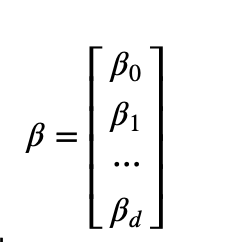

* The fitting model should be minimizing the following mean-squared loss

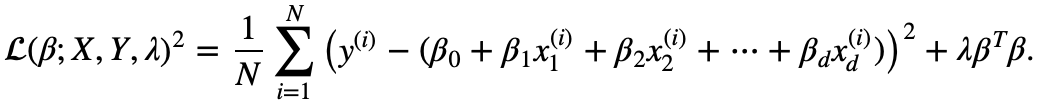

In [2]:
def linear_regression(X,Y,lam=0):
    """
    Train linear regression model

        Parameters:
                X (np.array): A numpy array with the shape (N, d) where N is the number of data points and d is dimension
                Y (np.array): A numpy array with the shape (N,), where N is the number of data points
                lam (int): The regularization coefficient where default value is 0
                
        Returns:
                beta (np.array): A numpy array with the shape (d+1, 1) that represents the linear regression weight vector
    """
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N
    
    Y_col = Y.reshape(-1,1)
   
    """
    X = N * d
    Y = N
    ----------
        N * d
        
    B = (X.T * X)-1 X.T * Y --> when not using the regularizer no need to np.linalg.solve
    Bridge = ((X.T @ X)/N + lam I)-1 @ (X.T @ Y)/N
        
    """
    X1 = np.c_[np.ones((N, 1)), X]
    # https://numpy.org/doc/stable/reference/generated/numpy.c_.html
    # test: np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    
#     beta = np.linalg.pinv((X1.T @ X1) + (lam * (X1.T @ X1))) @ (X1.T @ Y) # For non regularized regression
    
    
#     beta = np.linalg.pinv((X1.T @ X1) + (lam * (np.identity(X1.shape[1])))) @ (X1.T @ Y)
#     https://piazza.com/class/kjvxex9mg4k3l?cid=440
    
    beta = np.linalg.pinv(((X1.T @ X1)/N) + (lam * (np.identity(X1.shape[1])))) @ ((X1.T @ Y)/N)
    beta = beta.reshape(-1,1)
    
    
#     print(beta.shape)
#     print(beta)
    
    assert beta.shape == (d+1, 1)
    return beta

In [3]:
# Performning sanity check on implementation

some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_Y = np.sum(some_X, axis=1)
some_beta = linear_regression(some_X, some_Y, lam=0)
assert np.array_equal(some_beta.round(3), np.array([[ 0.],
                                                    [ 1.],
                                                    [ 1.],
                                                    [ 1.],
                                                    [ 1.],
                                                    [ 1.]]))

some_beta_2 = linear_regression(some_X, some_Y, lam=1)
assert np.array_equal(some_beta_2.round(3), np.array([[0.032],
                                                      [0.887],
                                                      [1.08 ],
                                                      [1.035],
                                                      [0.86 ],
                                                      [1.021]]))

another_X = some_X.T
another_Y = np.sum(another_X, axis=1)
another_beta = linear_regression(another_X, another_Y, lam=0)
assert np.array_equal(another_beta.round(3), np.array([[-0.01 ],
                                                       [ 0.995],
                                                       [ 1.096],
                                                       [ 0.993],
                                                       [ 0.996],
                                                       [ 0.995],
                                                       [ 0.946],
                                                       [ 0.966]]))

* The following function will use the learned weights from the linear regression to predict the labels.
    * The function output returns a numpy array with the shape (N,), whose ith element is defined by the following equation:
    
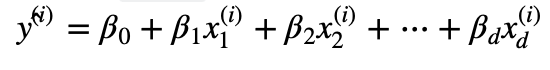

In [4]:
def linear_predict(X,beta):
    """
    Predict with linear regression model

        Parameters:
                X (np.array): A numpy array with the shape (N, d) where N is the number of data points and d is dimension
                beta (np.array): A numpy array of the shape (d+1,1) where d is the data dimension
                
        Returns:
                y_hat (np.array): A numpy array with the shape (N, )
    """
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert beta.shape == (d+1,1)
    
    """
    X = N * d * 1
    b =     d * 1
    --------------
        N * d * 1
        
        
    y_hat = B0 + B1X1 + B2X2 + ...... + BdXd
    """
    
    # your code here
#     raise NotImplementedError
    
    X1 = np.c_[np.ones((N, 1)), X]
    # concatenate a column of ones of shape N x 1, and multiply features matrix by beta vector
    
    
    y_hat = X1 @ beta
    
    y_hat = y_hat.reshape(-1)
    assert y_hat.size == N
    return y_hat

In [5]:
# Performing sanity check on implementation

some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_beta = 2.**(-np.arange(6).reshape(-1,1))
some_yhat = linear_predict(some_X, some_beta)
assert np.array_equal(some_yhat.round(3), np.array([ 3.062,  9.156,  6.188, 15.719,  3.062,  9.281,  7.062]))

* The following function will compute the linear residuals, and returns a numpy array of shape (N,) defined by the following equation

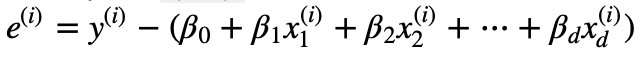

In [6]:
def linear_residuals(X,beta,Y):
    """
    Calculate residual vector using linear_predict function

        Parameters:
                X (np.array): A numpy array with the shape (N, d) where N is the number of data points and d is dimension
                Y (np.array): A numpy array with the shape (N, ) where N is the number of data points
                beta (np.array): A numpy array of the shape (d+1,1) where d is the data dimension
                
        Returns:
                e (np.array): A numpy array with the shape (N, ) that represents the residual vector
    """
    
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert beta.shape == (d+1,1)
    assert Y.shape == (N,)
    
    # your code here
#     raise NotImplementedError
    
    """
    e = y - (B0 + B1X1 + B2X2 + ...... + BDXD)
    
    e = y - y_hat
    
    """
    
    
    X1 = np.c_[np.ones((N, 1)), X] # --> Need to concat a column of ones to X to perform y_hat
    
    # reshape Y to make it a column vector to subtract from y_hat
    Y = Y.reshape(-1,1)
    
    e = Y - (X1 @ beta)
    
    e = e.reshape(-1)
    assert e.size == N
    return e

In [7]:
# Performing sanity check on implementation

some_X = (np.arange(35).reshape(7,5) ** 13) % 20
some_beta = 2.**(-np.arange(6).reshape(-1,1))
some_Y = np.sum(some_X, axis=1)
some_res = linear_residuals(some_X, some_beta, some_Y)
assert np.array_equal(some_res.round(3), np.array([16.938, 35.844, 33.812, 59.281, 16.938, 39.719, 16.938]))

Datasets

A dataset containing the blood sulfate measured in a Baboon can be found at http://www.statsci.org/data/general/brunhild.html. The observations are recorded as a function of time and there are 20 records in the file.

* **Input/Output**: This data has two columns; the first is the time of measurement with the unit being an hour since the radioactive material injection, and the second column is the blood sulfate levels in the unit of Geiger counter counts times $10^{-4}$.

* **Missing Data**: There is no missing data.

* **Final Goal**: We want to **properly** fit a linear regression model.

In [8]:
df_1 = pd.read_csv('brunhild.txt', sep='\t')
df_1

,Hours,Sulfate
0,2,15.11
1,4,11.36
2,6,9.77
3,8,9.09
4,10,8.48
5,15,7.69
6,20,7.33
7,25,7.06
8,30,6.70
9,40,6.43


* Following functions will help draw the regression plots

In [9]:
def newline(p1, p2, ax):
    # This code was borrowed from 
    # https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

def draw_regression(X,Y,beta,ax):
    ax.scatter(X, Y, c='b', marker='o')
    line_obj = newline([0, np.sum(beta*np.array([[1],[0]]))], [2, np.sum(beta*np.array([[1],[2]]))], ax)
    line_obj.set_color('black')
    line_obj.set_linestyle('--')
    line_obj.set_linewidth(2)
    return ax

### Linear Regression in the original coordinates

[[ 9.20292856]
 [-0.03375993]]


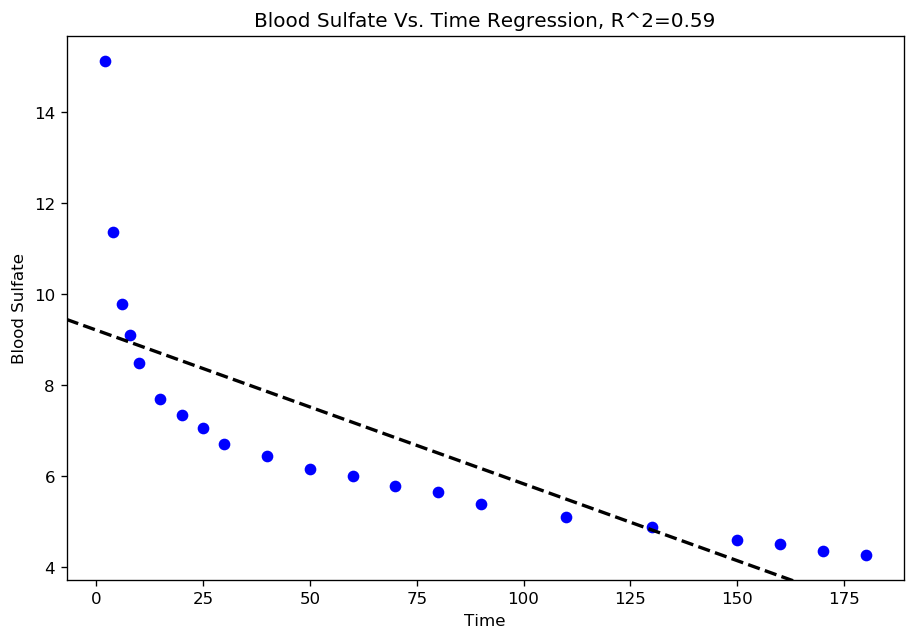

In [10]:
X_1 = df_1['Hours'].values.reshape(-1,1)
Y_1 = df_1['Sulfate'].values.reshape(-1)

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_1 = linear_regression(X_1,Y_1,lam=0)
print(beta_1)
ax = draw_regression(X_1,Y_1,beta_1,ax)

residuals_1 = linear_residuals(X_1, beta_1, Y_1)
fitted_1 = linear_predict(X_1, beta_1)

r2_1 = r2_score(Y_1, fitted_1) #computes the R^2 score

ax.set_xlabel('Time')
ax.set_ylabel('Blood Sulfate')
_ = ax.set_title('Blood Sulfate Vs. Time Regression, R^2=%.2f' %r2_1)

Using seaborn and comparing the plot above

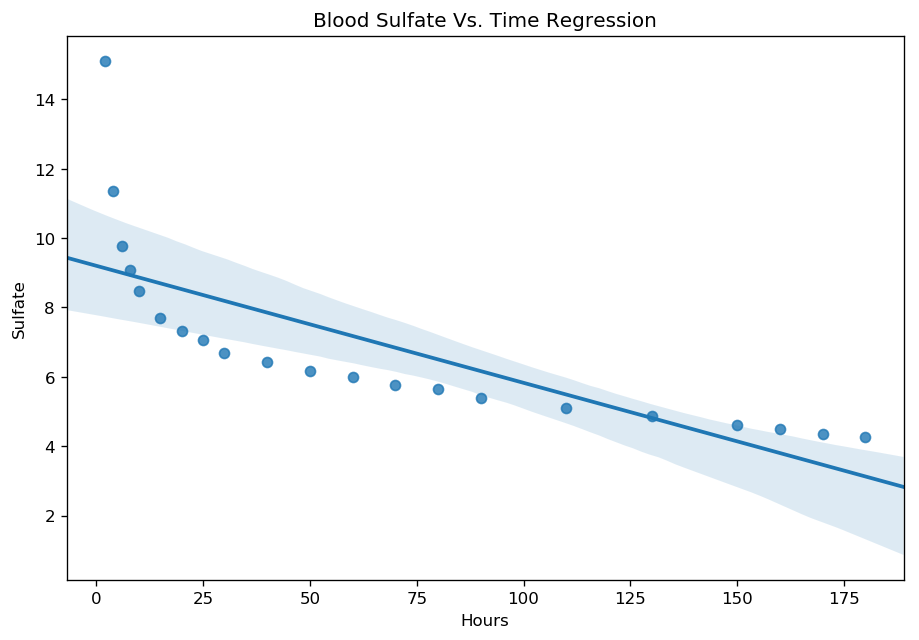

In [11]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
sns.regplot(x='Hours', y='Sulfate', data=df_1, ax=ax)
_ = ax.set_title('Blood Sulfate Vs. Time Regression')

Drawing the residuals againts the fitted values

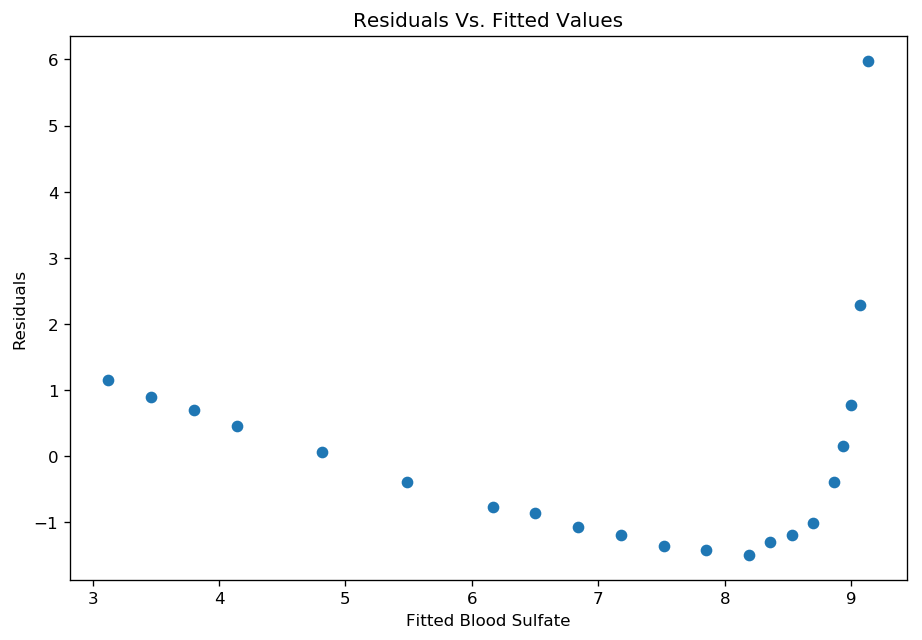

In [12]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
ax.scatter(fitted_1, residuals_1)

ax.set_xlabel('Fitted Blood Sulfate')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Values')

### Regression in the log coordinates

* Below is the linear regression of the log of the blood sulfate against the log of time, utilizing the linear_regression and the linear_residual functions implemented above.

[[ 2.7658369 ]
 [-0.24704615]]


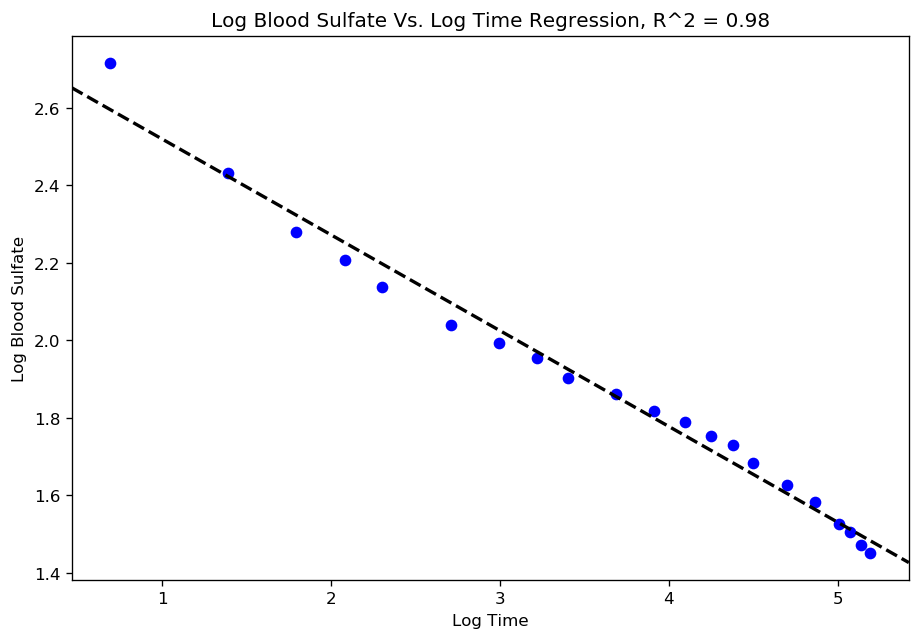

In [13]:
log_X_1 = np.log(df_1['Hours'].values.reshape(-1,1))
log_Y_1 = np.log(df_1['Sulfate'].values.reshape(-1))

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_1_log = linear_regression(log_X_1,log_Y_1,lam=0)
print(beta_1_log)
residuals_1_log = linear_residuals(log_X_1, beta_1_log, log_Y_1)
fitted_1_log = linear_predict(log_X_1, beta_1_log)

r2_1_log = r2_score(log_Y_1, fitted_1_log) #computes the R^2 score

ax = draw_regression(log_X_1,log_Y_1,beta_1_log,ax)

ax.set_xlabel('Log Time')
ax.set_ylabel('Log Blood Sulfate')
_ = ax.set_title('Log Blood Sulfate Vs. Log Time Regression, R^2 = %.2f' %r2_1_log)

Utilizing seaborn

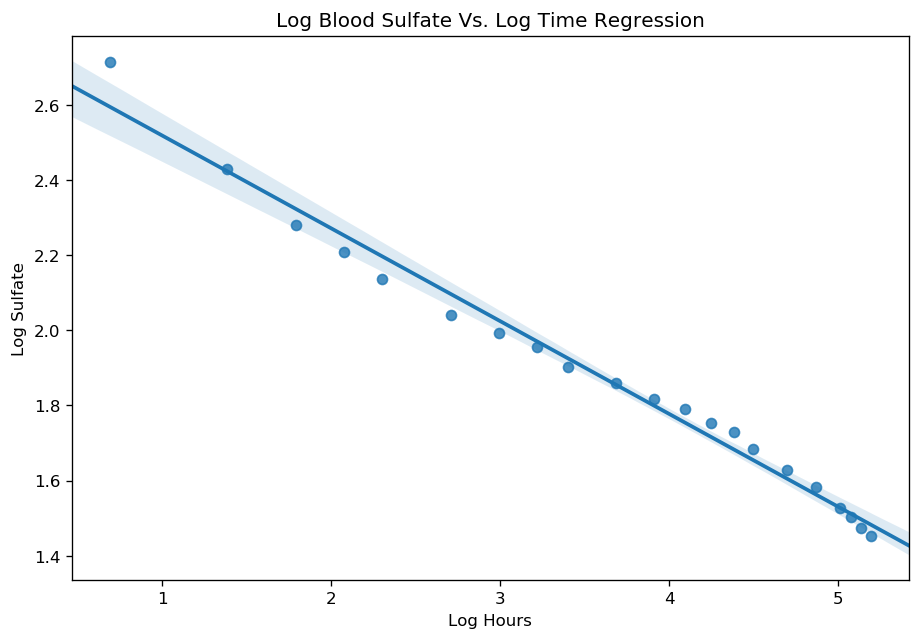

In [14]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
log_df_1 = df_1.copy(deep=True)
log_df_1['Log Hours'] = np.log(df_1['Hours'])
log_df_1['Log Sulfate'] = np.log(df_1['Sulfate'])
sns.regplot(x='Log Hours', y='Log Sulfate', data=log_df_1, ax=ax)
_ = ax.set_title('Log Blood Sulfate Vs. Log Time Regression')

* Plotting the residuals against the fitted log blood sulfate

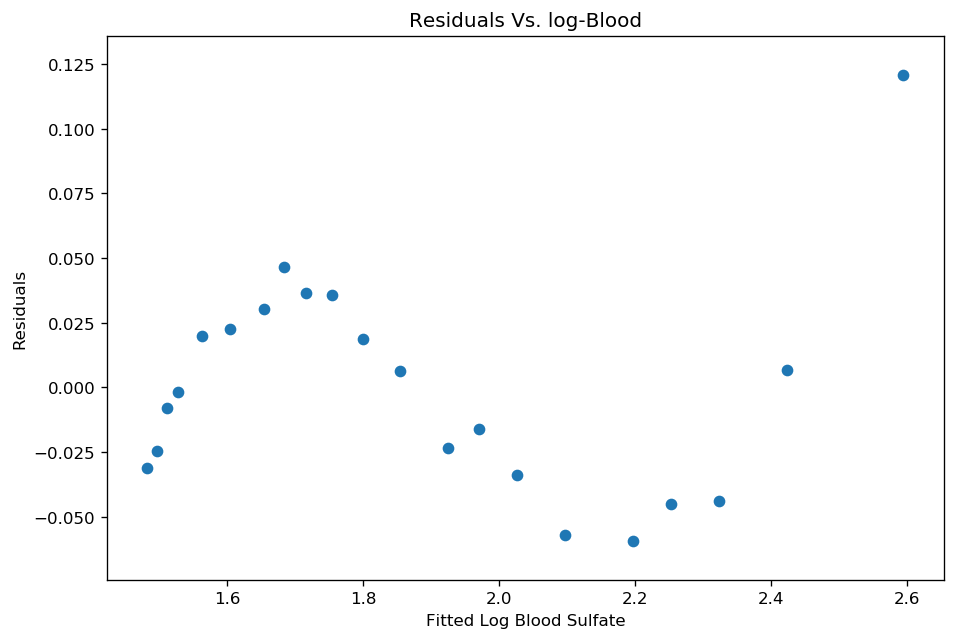

In [15]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
ax.scatter(fitted_1_log, residuals_1_log)

ax.set_xlabel('Fitted Log Blood Sulfate')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. log-Blood')

## Dataset for Multivariate

At http://www.statsci.org/data/oz/physical.html, you will find a dataset of measurements by M. Larner, made in 1996. These measurements include body mass, and various diameters. Build a linear regression of predicting the body mass from these diameters.

Datet Summary

* **Input/Output**: This data has 11 columns, with the first column being the body mass and label.

* **Missing Data**: There is no missing data.

* **Final Goal**: We want to fit a linear regression model.

In [16]:
df_2 = pd.read_csv('physical.txt', sep = '\t')
df_2

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,77.0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,85.5,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,63.0,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,80.5,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,79.5,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0
5,94.0,30.5,38.0,112.0,39.0,121.0,101.0,180.0,39.5,57.5,59.0
6,66.0,26.5,29.0,93.0,35.0,105.0,76.0,177.5,38.5,50.0,58.5
7,69.0,27.0,31.0,95.0,37.0,108.0,84.0,182.5,36.0,49.0,60.0
8,65.0,26.5,29.0,93.0,35.0,112.0,74.0,178.5,34.0,47.0,55.5
9,58.0,26.5,31.0,96.0,35.0,103.0,76.0,168.5,35.0,46.0,58.0


* Residuals are plotted against fitted Mass

0.977210661741
mean square error: 2.61


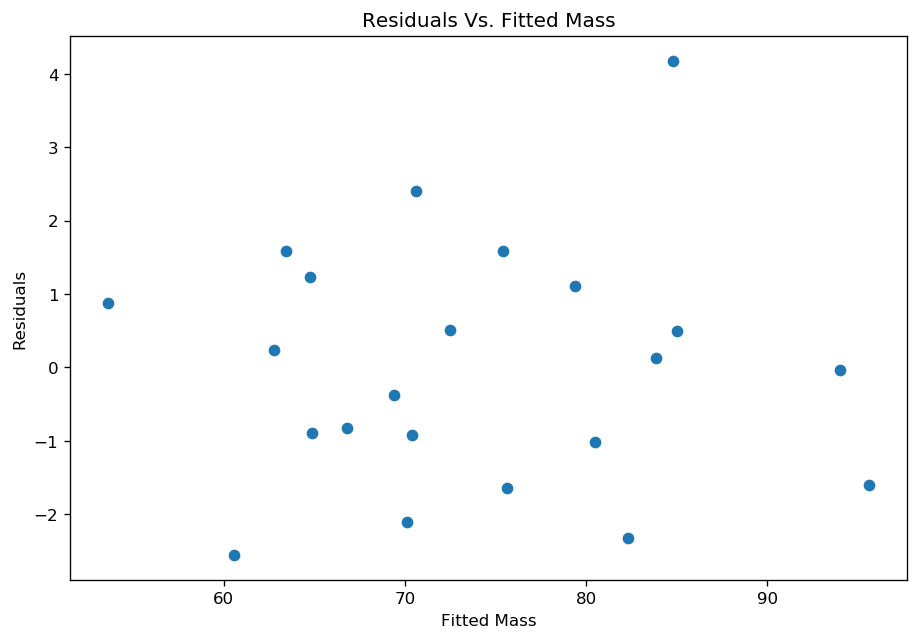

In [17]:
X_2 = df_2.loc[:, df_2.columns != 'Mass'].values
Y_2 = df_2['Mass'].values

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_2 = linear_regression(X_2,Y_2,lam=0)
residuals_2 = linear_residuals(X_2, beta_2, Y_2)
fitted_2 = linear_predict(X_2, beta_2)

r2_22 = r2_score(Y_2, fitted_2) #computes the R^2 score
print(r2_22)


ax.scatter(fitted_2, residuals_2)

ax.set_xlabel('Fitted Mass')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Mass')

print('mean square error: %.2f' %np.mean(residuals_2**2))

* In the following section, find the linear regression between the input variables and the cubic root of the body mass, and therefore plot the cubic root residuals against the fitted cubic root mass

0.975847620621
mean square error: 0.00


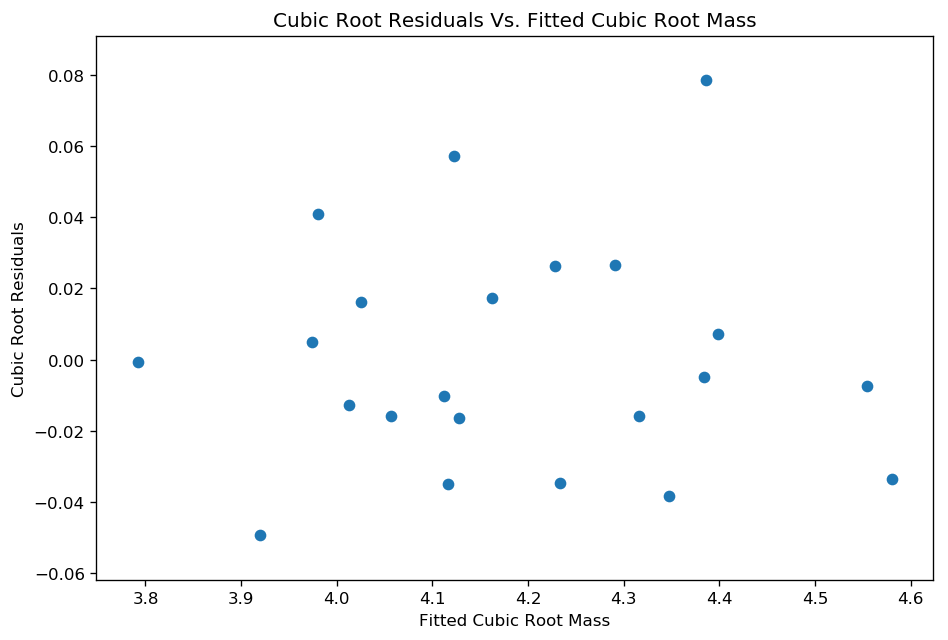

In [18]:
X_2 = df_2.loc[:, df_2.columns != 'Mass'].values
Y_2_cr = (df_2['Mass'].values**(1./3.))

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_2_cr = linear_regression(X_2,Y_2_cr,lam=0)
residuals_2_cr = linear_residuals(X_2, beta_2_cr, Y_2_cr)
fitted_2_cr = linear_predict(X_2, beta_2_cr)

r2_2_cr = r2_score(Y_2_cr, fitted_2_cr) #computes the R^2 score
print(r2_2_cr)

print('mean square error: %.2f' %np.mean(residuals_2_cr**2))


ax.scatter(fitted_2_cr, residuals_2_cr)

ax.set_xlabel('Fitted Cubic Root Mass')
ax.set_ylabel('Cubic Root Residuals')
_ = ax.set_title('Cubic Root Residuals Vs. Fitted Cubic Root Mass')

* To compare the cubic root labels in the original scale, raise the fitted cubic root mass to the power of 3, and compare them with the original mass values

-121622.194386
mean square error: 2.88


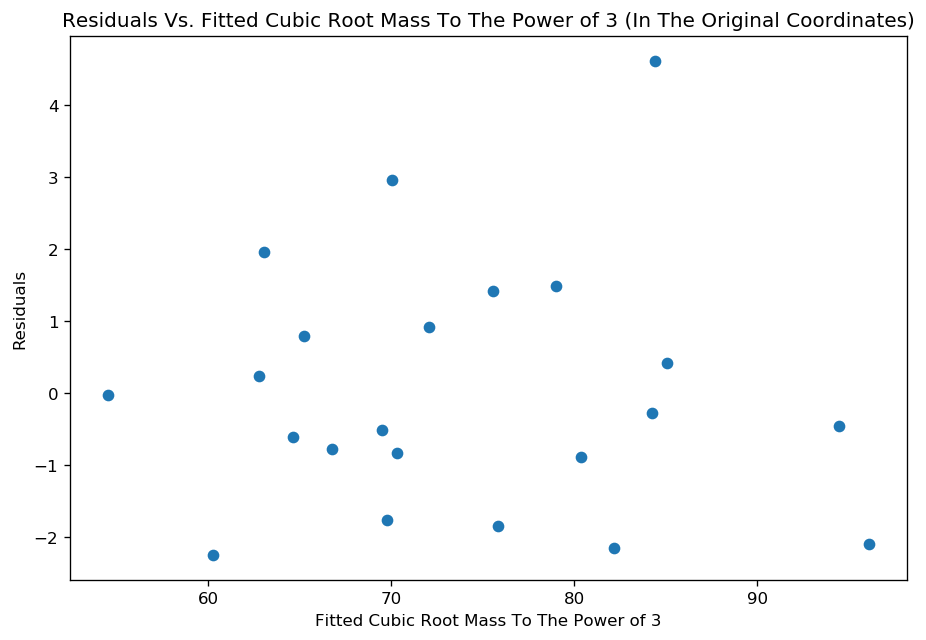

In [19]:
X_2 = df_2.loc[:, df_2.columns != 'Mass'].values
Y_2 = df_2['Mass'].values
Y_2_cr = (Y_2**(1./3.))

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_2_cr = linear_regression(X_2, Y_2_cr, lam=0)
fitted_2_orig = (linear_predict(X_2, beta_2_cr))**3.
residuals_2_orig = Y_2 - fitted_2_orig

r2_2_orig = r2_score(Y_2_cr, fitted_2_orig) #computes the R^2 score
print(r2_2_orig)



ax.scatter(fitted_2_orig, residuals_2_orig)

ax.set_xlabel('Fitted Cubic Root Mass To The Power of 3')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Cubic Root Mass To The Power of 3 (In The Original Coordinates)')

print('mean square error: %.2f' %np.mean(residuals_2_orig**2))

## Dataset on Abalone data

* At https://archive.ics.uci.edu/ml/datasets/Abalone, you will find a dataset of measurements by W. J. Nash, T. L. Sellers, S. R. Talbot, A. J. Cawthorn and W. B. Ford, made in 1992. These are a variety of measurements of blacklip abalone (Haliotis rubra; delicious by repute) of various ages and genders.

Dataset summary

* **Input/Output**: This data has 9 columns, with the last column being the rings count which serves as the age of the abalone and the label.

* **Missing Data**: There is no missing data.

* **Final Goal**: We want to fit a linear regression model predicting the age.

In [20]:
df_3 = pd.read_csv('abalone.data', sep = ',', header=None)

df_3.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
              'Viscera weight', 'Shell weight', 'Rings']
print(df_3.shape)
df_3.head()

(4177, 9)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* Predicting the age from the measurements ignoring gender 

mean square error = 4.91


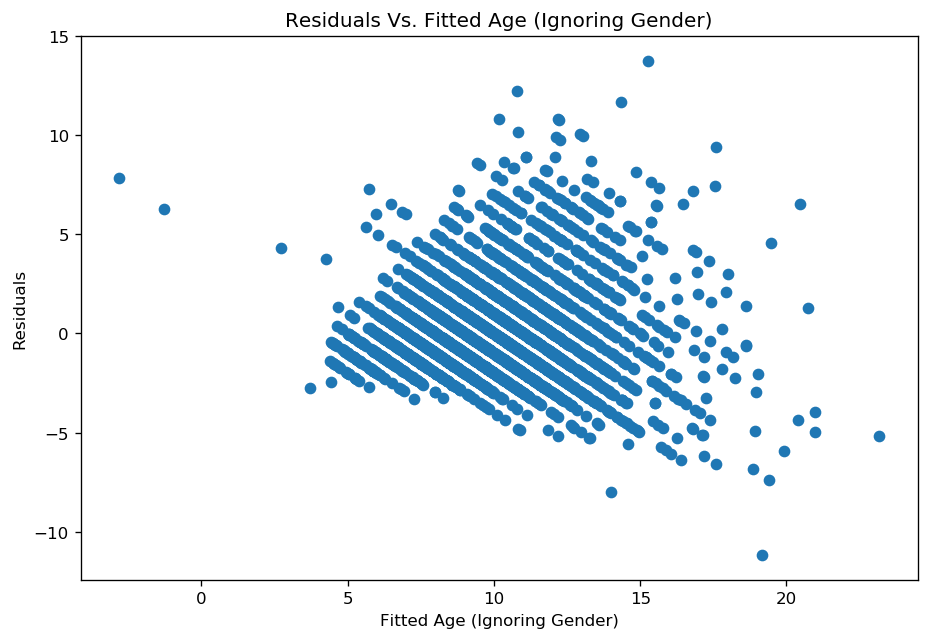

In [21]:
X_3 = df_3.loc[:, (df_3.columns != 'Rings') & (df_3.columns != 'Sex')].values
Y_3 = df_3['Rings'].values

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_3 = linear_regression(X_3,Y_3,lam=0)
residuals_3 = linear_residuals(X_3, beta_3, Y_3)
fitted_3 = linear_predict(X_3, beta_3)

ax.scatter(fitted_3, residuals_3)

ax.set_xlabel('Fitted Age (Ignoring Gender)')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Age (Ignoring Gender)')

print('mean square error = %.2f' %np.mean(residuals_3**2))

* Predict age from the measurements including gender: 
 * Convert gender into a numeric value by replacing `F` with 1, `M` with 0, and `I` with -1 to run the linear regression.

In [22]:
X_3_gender = df_3.loc[:, (df_3.columns != 'Rings') & (df_3.columns != 'Sex')].values
X_3_gender = np.concatenate([X_3, np.array([{'F':1, 'M':0, 'I':-1}.get(x) for x in df_3.Sex]).reshape(-1,1)], axis=1)
Y_3 = df_3['Rings'].values

In [23]:
X_3_gender

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  ,  0.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  0.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  1.    ],
       ..., 
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  0.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 ,  1.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 ,  0.    ]])

In [24]:
Y_3

array([15,  7,  9, ...,  9, 10, 12])

mean square error = 4.85


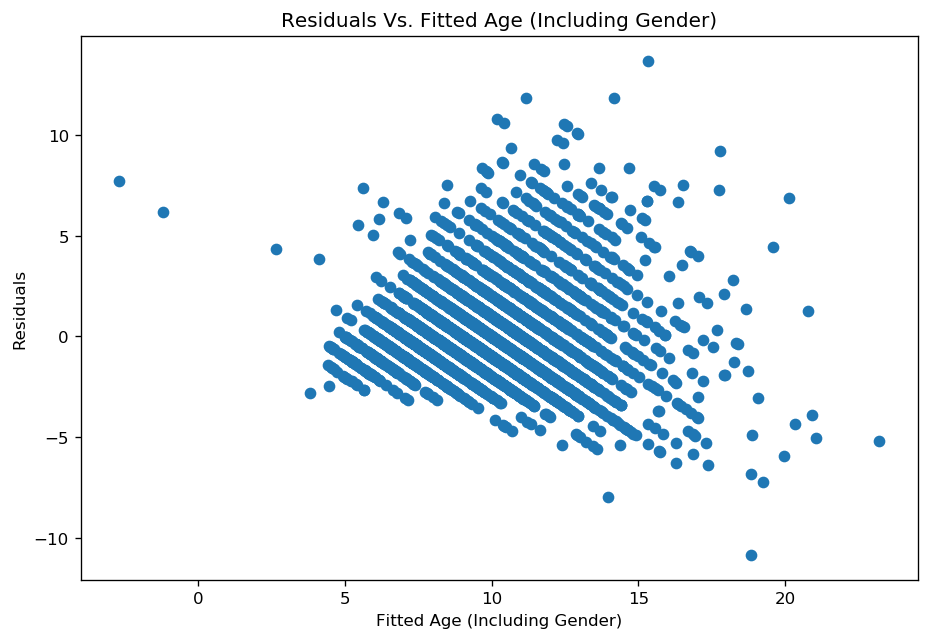

In [25]:
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_3_gender = linear_regression(X_3_gender,Y_3,lam=0)
residuals_3_gender = linear_residuals(X_3_gender, beta_3_gender, Y_3)
fitted_3_gender = linear_predict(X_3_gender, beta_3_gender)

ax.scatter(fitted_3_gender, residuals_3_gender)

ax.set_xlabel('Fitted Age (Including Gender)')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Age (Including Gender)')

print('mean square error = %.2f' %np.mean(residuals_3_gender**2))

* Predicting the log of age from the measurements ignoring gender

mean square error (in the original coordinates) = 5.31


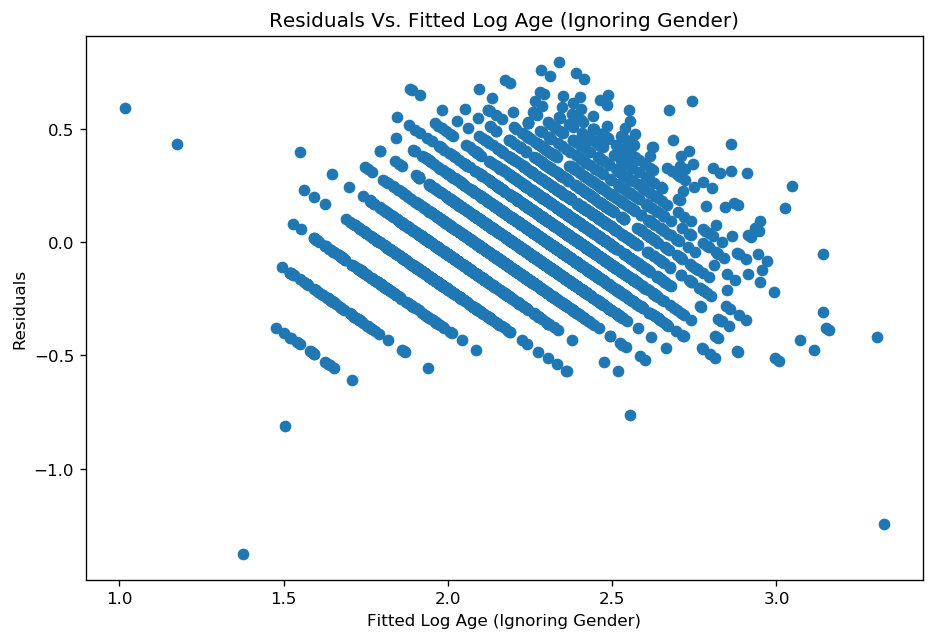

In [26]:
X_3 = df_3.loc[:, (df_3.columns != 'Rings') & (df_3.columns != 'Sex')].values
Y_3 = df_3['Rings'].values
Y_3_log = np.log(df_3['Rings'].values)

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_3_log = linear_regression(X_3,Y_3_log,lam=0)
residuals_3_log = linear_residuals(X_3, beta_3_log, Y_3_log)
fitted_3_log = linear_predict(X_3, beta_3_log)

ax.scatter(fitted_3_log, residuals_3_log)

ax.set_xlabel('Fitted Log Age (Ignoring Gender)')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Log Age (Ignoring Gender)')

fitted_3_log_orig = np.exp(fitted_3_log) #predicted values back to the original coordinates
residuals_3_log_orig = Y_3 - fitted_3_log_orig #residuals in the original coordinates
print('mean square error (in the original coordinates) = %.2f' %np.mean(residuals_3_log_orig**2))

* Predicting the log of age from the measurements including gender 

mean square error (in the original coordinates) = 5.24


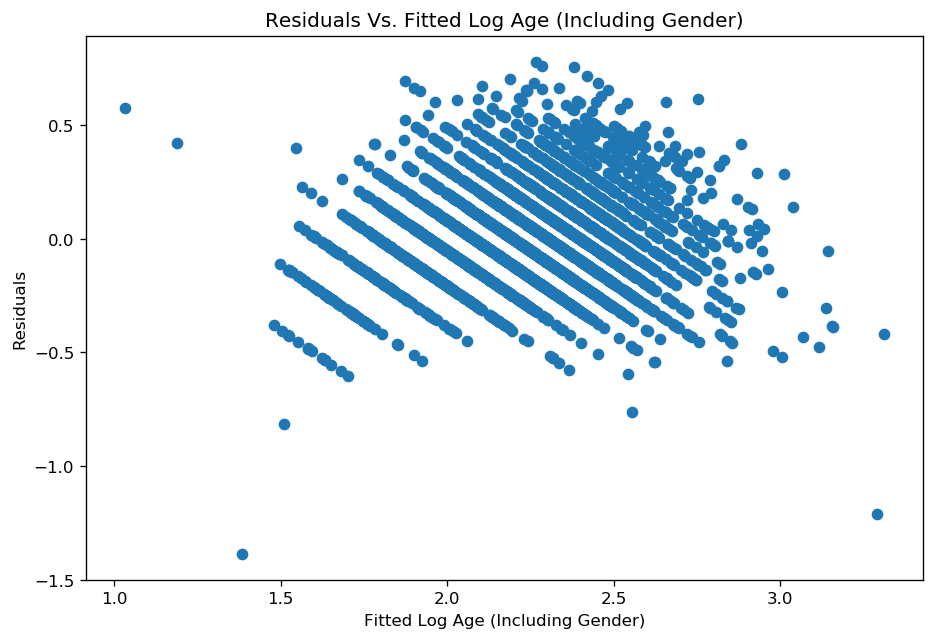

In [27]:
_3_gender = df_3.loc[:, (df_3.columns != 'Rings') & (df_3.columns != 'Sex')].values
X_3_gender = np.concatenate([X_3_gender, np.array([{'F':1, 'M':0, 'I':-1}.get(x) for x in df_3.Sex]).reshape(-1,1)], axis=1)
Y_3 = df_3['Rings'].values
Y_3_log = np.log(df_3['Rings'].values)

fig, ax = plt.subplots(figsize=(9,6.), dpi=120)

beta_3_gender_log = linear_regression(X_3_gender,Y_3_log,lam=0)
residuals_3_gender_log = linear_residuals(X_3_gender, beta_3_gender_log, Y_3_log)
fitted_3_gender_log = linear_predict(X_3_gender, beta_3_gender_log)

ax.scatter(fitted_3_gender_log, residuals_3_gender_log)

ax.set_xlabel('Fitted Log Age (Including Gender)')
ax.set_ylabel('Residuals')
_ = ax.set_title('Residuals Vs. Fitted Log Age (Including Gender)')

fitted_3_gender_log_orig = np.exp(fitted_3_gender_log) # predicted values back to the original coordinates
residuals_3_gender_log = Y_3 - fitted_3_gender_log_orig
print('mean square error (in the original coordinates) = %.2f' %np.mean(residuals_3_gender_log**2))



* Applying cross-validation for regularization:

 * Use cross validation to find the value of $\lambda$ to predict the log of the output variable against all the input variables. Convert the gender input to a numeric value using the gender conversion, and plot the cross-validation mean square error against the log of $\lambda$.

* In the following code, the variable `Y_transform` determines whether we try to predict the labels in the original coordinates or in the logarithmic space. If the value of `Y_transform` is `linear`, we apply linear transformation in the original coordinates, and if its value is `log`, we use logarithmic transformation. In case work in the logarithmic space, in order to find the mean square error, after finding the predicted values, we transform them back into the original coordinates using `np.exp` and then compare them to the correct values.

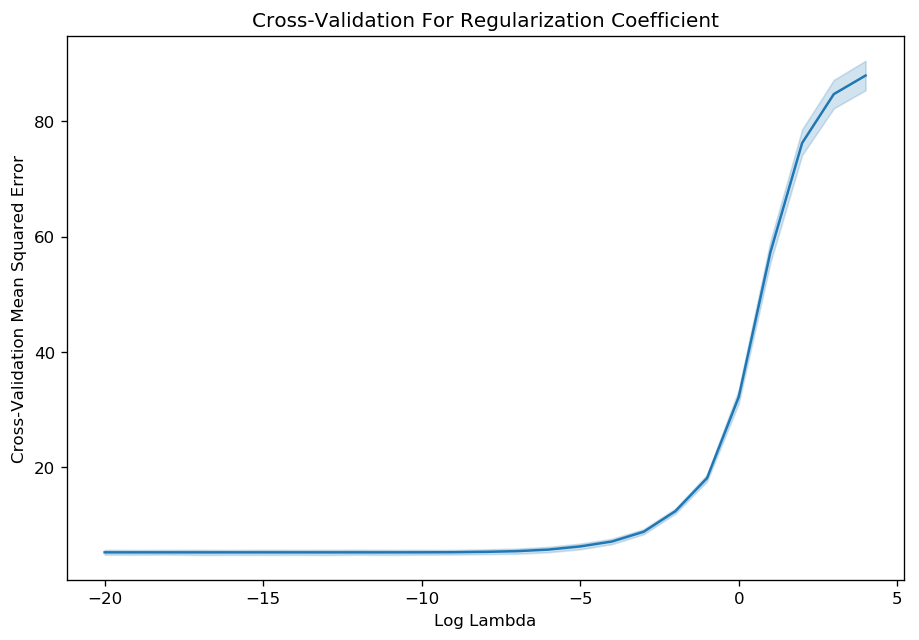

In [28]:
log_lambda_list = np.arange(-20, 5)
X_3_gender = df_3.loc[:, (df_3.columns != 'Rings') & (df_3.columns != 'Sex')].values
X_3_gender = np.concatenate([X_3_gender, np.array([{'F':1, 'M':0, 'I':-1}.get(x) for x in df_3.Sex]).reshape(-1,1)], axis=1)
Y_3 = df_3['Rings'].values
Y_3_log = np.log(df_3['Rings'].values)

Y_transform = 'log' # 'linear': output variable in the original coordinate is considered, 'log': log of output is considered

if Y_transform == 'linear':
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_3_gender, Y_3, test_size=0.2, random_state=12345, shuffle=True)
if Y_transform == 'log':
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_3_gender, Y_3_log, test_size=0.2, random_state=12345, shuffle=True)

kf = KFold(n_splits=10, shuffle=True, random_state=12345)

cross_val_mses = []
for train_idx, val_idx in kf.split(X_train_val):
    X_train, X_val, Y_train, Y_val = X_train_val[train_idx], X_train_val[val_idx], Y_train_val[train_idx], Y_train_val[val_idx]
    
    for log_lambda in log_lambda_list:
        beta_3_cv = linear_regression(X_train, Y_train, lam=np.exp(log_lambda))
        if Y_transform == 'linear':
            val_residuals = linear_residuals(X_val, beta_3_cv, Y_val)
            
        if Y_transform == 'log':
            val_predict_log = linear_predict(X_val, beta_3_cv) # predicted in log space
            val_predict_log_orig = np.exp(val_predict_log) # get back to original coordinates

            val_residuals = np.exp(Y_val) - val_predict_log_orig
            
        val_mse = np.mean(val_residuals**2)
        
        cross_val_mses.append([log_lambda, val_mse])

cross_val_mses = np.array(cross_val_mses)
fig, ax = plt.subplots(figsize=(9,6.), dpi=120)
x_name, y_name = 'Log Lambda', 'Cross-Validation Mean Squared Error'
cv_df = pd.DataFrame(cross_val_mses, columns =[x_name, y_name])
sns.lineplot(x=x_name, y=y_name,data=cv_df, ax=ax)
_ = ax.set_title('Cross-Validation For Regularization Coefficient')

In [29]:
avg_cv_err_df = cv_df.groupby(x_name).mean()
best_log_lam = avg_cv_err_df[y_name].idxmin()
best_cv_mse = avg_cv_err_df.loc[best_log_lam][y_name]

print(f'Best Log Lambda value was {best_log_lam} with a cross-validation MSE of %.3f' %best_cv_mse)

beta_full = linear_regression(X_train_val,Y_train_val,lam=np.exp(best_log_lam))

if Y_transform == 'linear':
    test_residuals = linear_residuals(X_test, beta_full, Y_test)
    test_mse = np.mean(test_residuals**2)
if Y_transform == 'log':
    test_predict = linear_predict(X_test, beta_full)
    test_predict_orig = np.exp(test_predict)
    test_residuals = np.exp(Y_test) - test_predict_orig
    test_mse = np.mean(test_residuals**2)
print(f'The resulting test mean squared error would be %.3f' % test_mse)

Best Log Lambda value was -13.0 with a cross-validation MSE of 5.144
The resulting test mean squared error would be 10.706
